In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set_theme(style='whitegrid')

In [2]:
df = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")

In [3]:
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [4]:
df.shape

(235795, 56)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [6]:
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

## التوزيع الاحصائي للخصائص الرقمية

In [7]:
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


## التوزيع الاحصائي للخصائص الفئوية

In [8]:
df.describe(include=['object'])

,FILENAME,URL,Domain,TLD,Title
count,235795,235795,235795,235795,235795
unique,235795,235370,220086,695,197874
top,521848.txt,https://disclosepack.myportfolio.com/,ipfs.io,com,0
freq,1,2,1197,112554,32719


## فحص اولي للتأكد من القيم المفقودة

In [9]:
df.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

## توزيع الروابط الشرعية مقابل الاحتيالية (خاصية الهدف label)

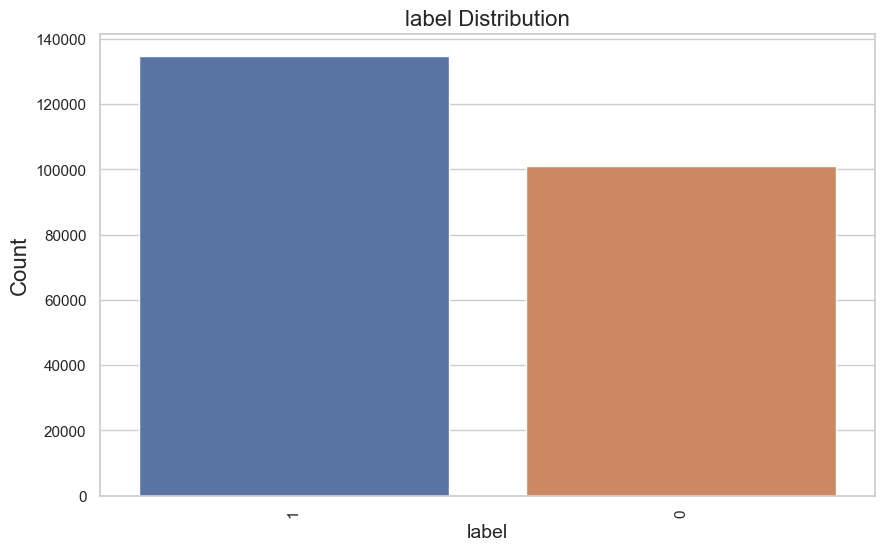

In [10]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='label', data=df, order=df['label'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('label', fontsize=14)
plt.ylabel('Count', fontsize=16)
plt.title('label Distribution', fontsize=16)
plt.show()

## أكثر النطاقات المستوى الأعلى (TLDs) شيوعًا في مجموعة البيانات.

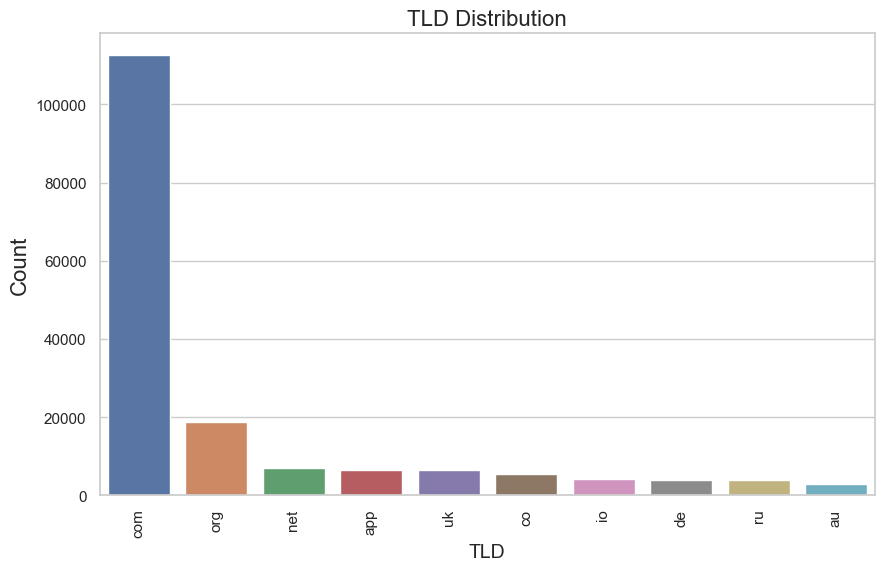

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='TLD', data=df, order=df['TLD'].value_counts().head(10).index)
plt.xticks(rotation=90)
plt.xlabel('TLD', fontsize=14)
plt.ylabel('Count', fontsize=16)
plt.title('TLD Distribution', fontsize=16)
plt.show()

## العلاقة بين طول الرابط URL وكونه احتياليًا؟

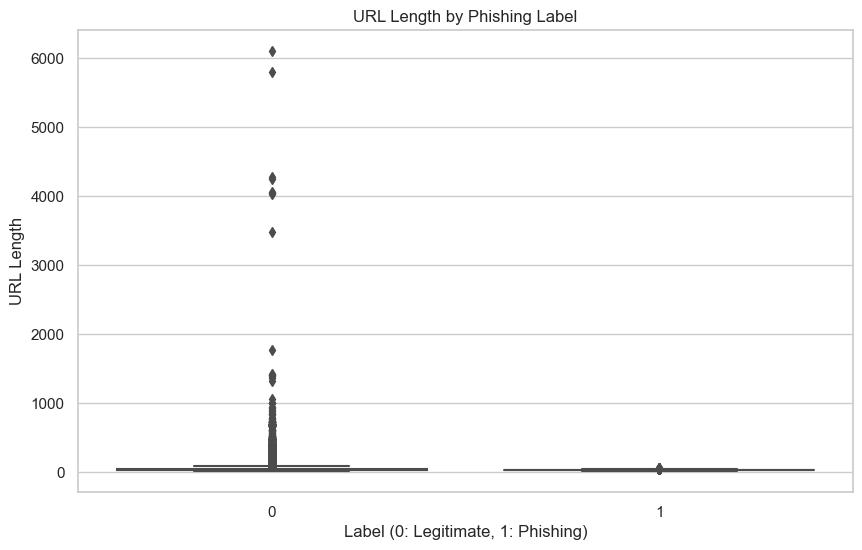

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='URLLength', data=df)
plt.title('URL Length by Phishing Label')
plt.xlabel('Label (0: Legitimate, 1: Phishing)')
plt.ylabel('URL Length')
plt.show()

## العلاقة بين عدد الصور وكون الموقع احتياليًا؟

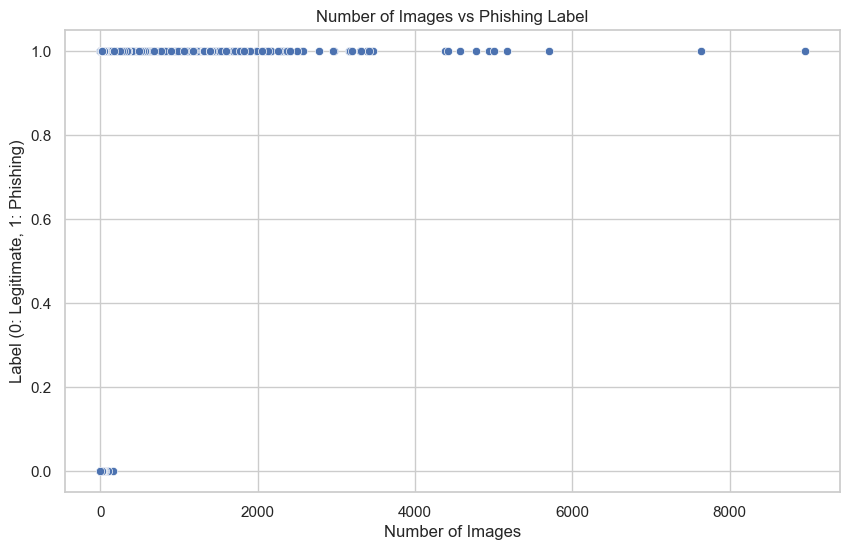

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='NoOfImage', y='label')
plt.title('Number of Images vs Phishing Label')
plt.xlabel('Number of Images')
plt.ylabel('Label (0: Legitimate, 1: Phishing)')
plt.show()

## الروابط الخارجية

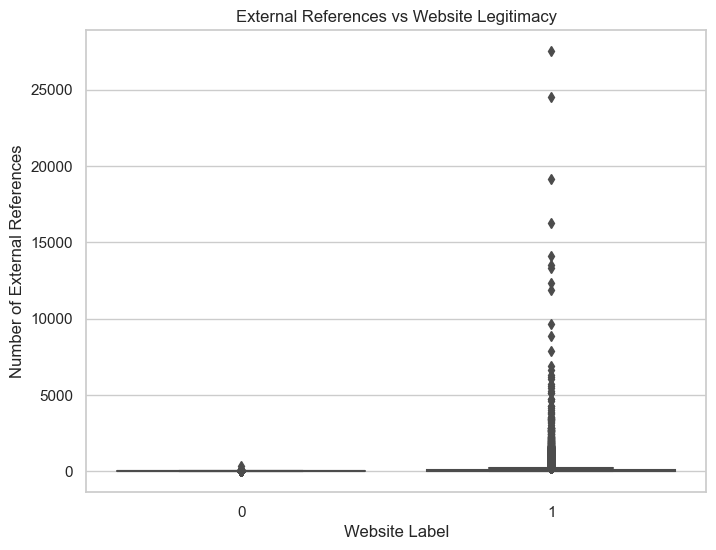

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='NoOfExternalRef', data=df)
plt.xlabel('Website Label')
plt.ylabel('Number of External References')
plt.title('External References vs Website Legitimacy')
plt.show()

## نسب المواقع الاحتيالية لأعلى 20 نطاق مستوى أعلى (TLD) من حيث العدد الإجمالي

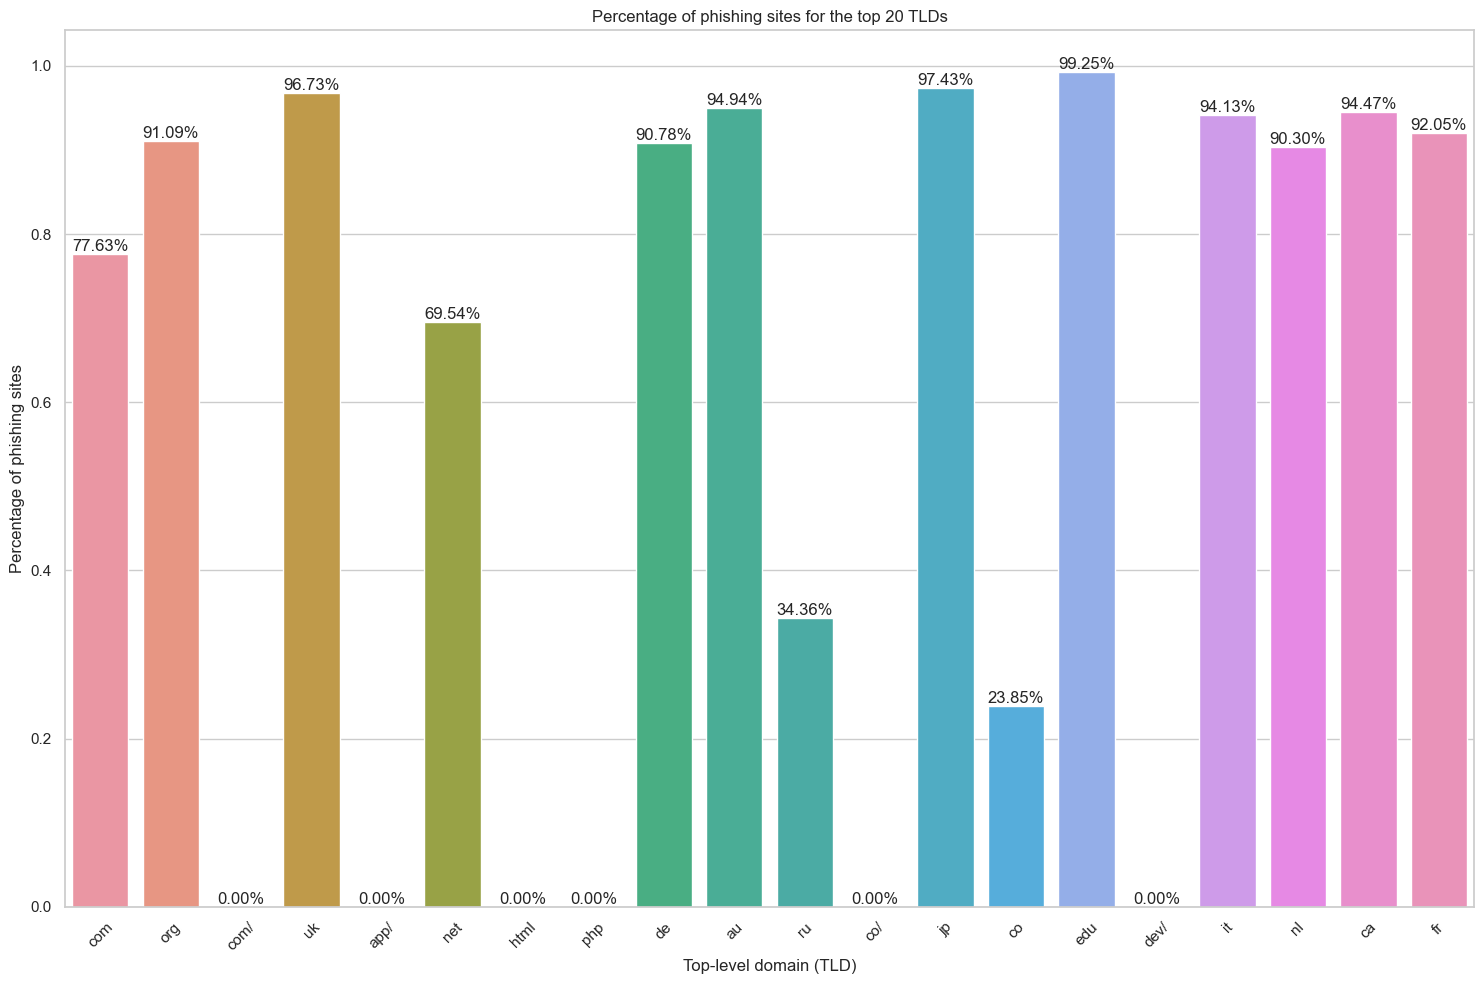

In [15]:
# استخراج TLD من URL
df['TLD'] = df['URL'].str.split('.').str[-1]

# حساب نسبة المواقع الاحتيالية لكل TLD
tld_phishing_ratio = df.groupby('TLD').agg({
    'label': ['count', lambda x: (x == 1).sum() / len(x)]
}).sort_values(('label', 'count'), ascending=False)

tld_phishing_ratio.columns = ['total_count', 'phishing_ratio']
tld_phishing_ratio = tld_phishing_ratio.reset_index()

# اختيار أعلى 20 TLD من حيث العدد الإجمالي
top_20_tlds = tld_phishing_ratio.head(20)

# إنشاء الرسم البياني
plt.figure(figsize=(15, 10))
sns.barplot(x='TLD', y='phishing_ratio', data=top_20_tlds)
plt.title('Percentage of phishing sites for the top 20 TLDs')
plt.xlabel('Top-level domain (TLD)')
plt.ylabel('Percentage of phishing sites')
plt.xticks(rotation=45)

# إضافة التسميات على الأعمدة
for i, v in enumerate(top_20_tlds['phishing_ratio']):
    plt.text(i, v, f'{v:.2%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## تحليل الارتباط بين الخصائص الرقمية

In [16]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

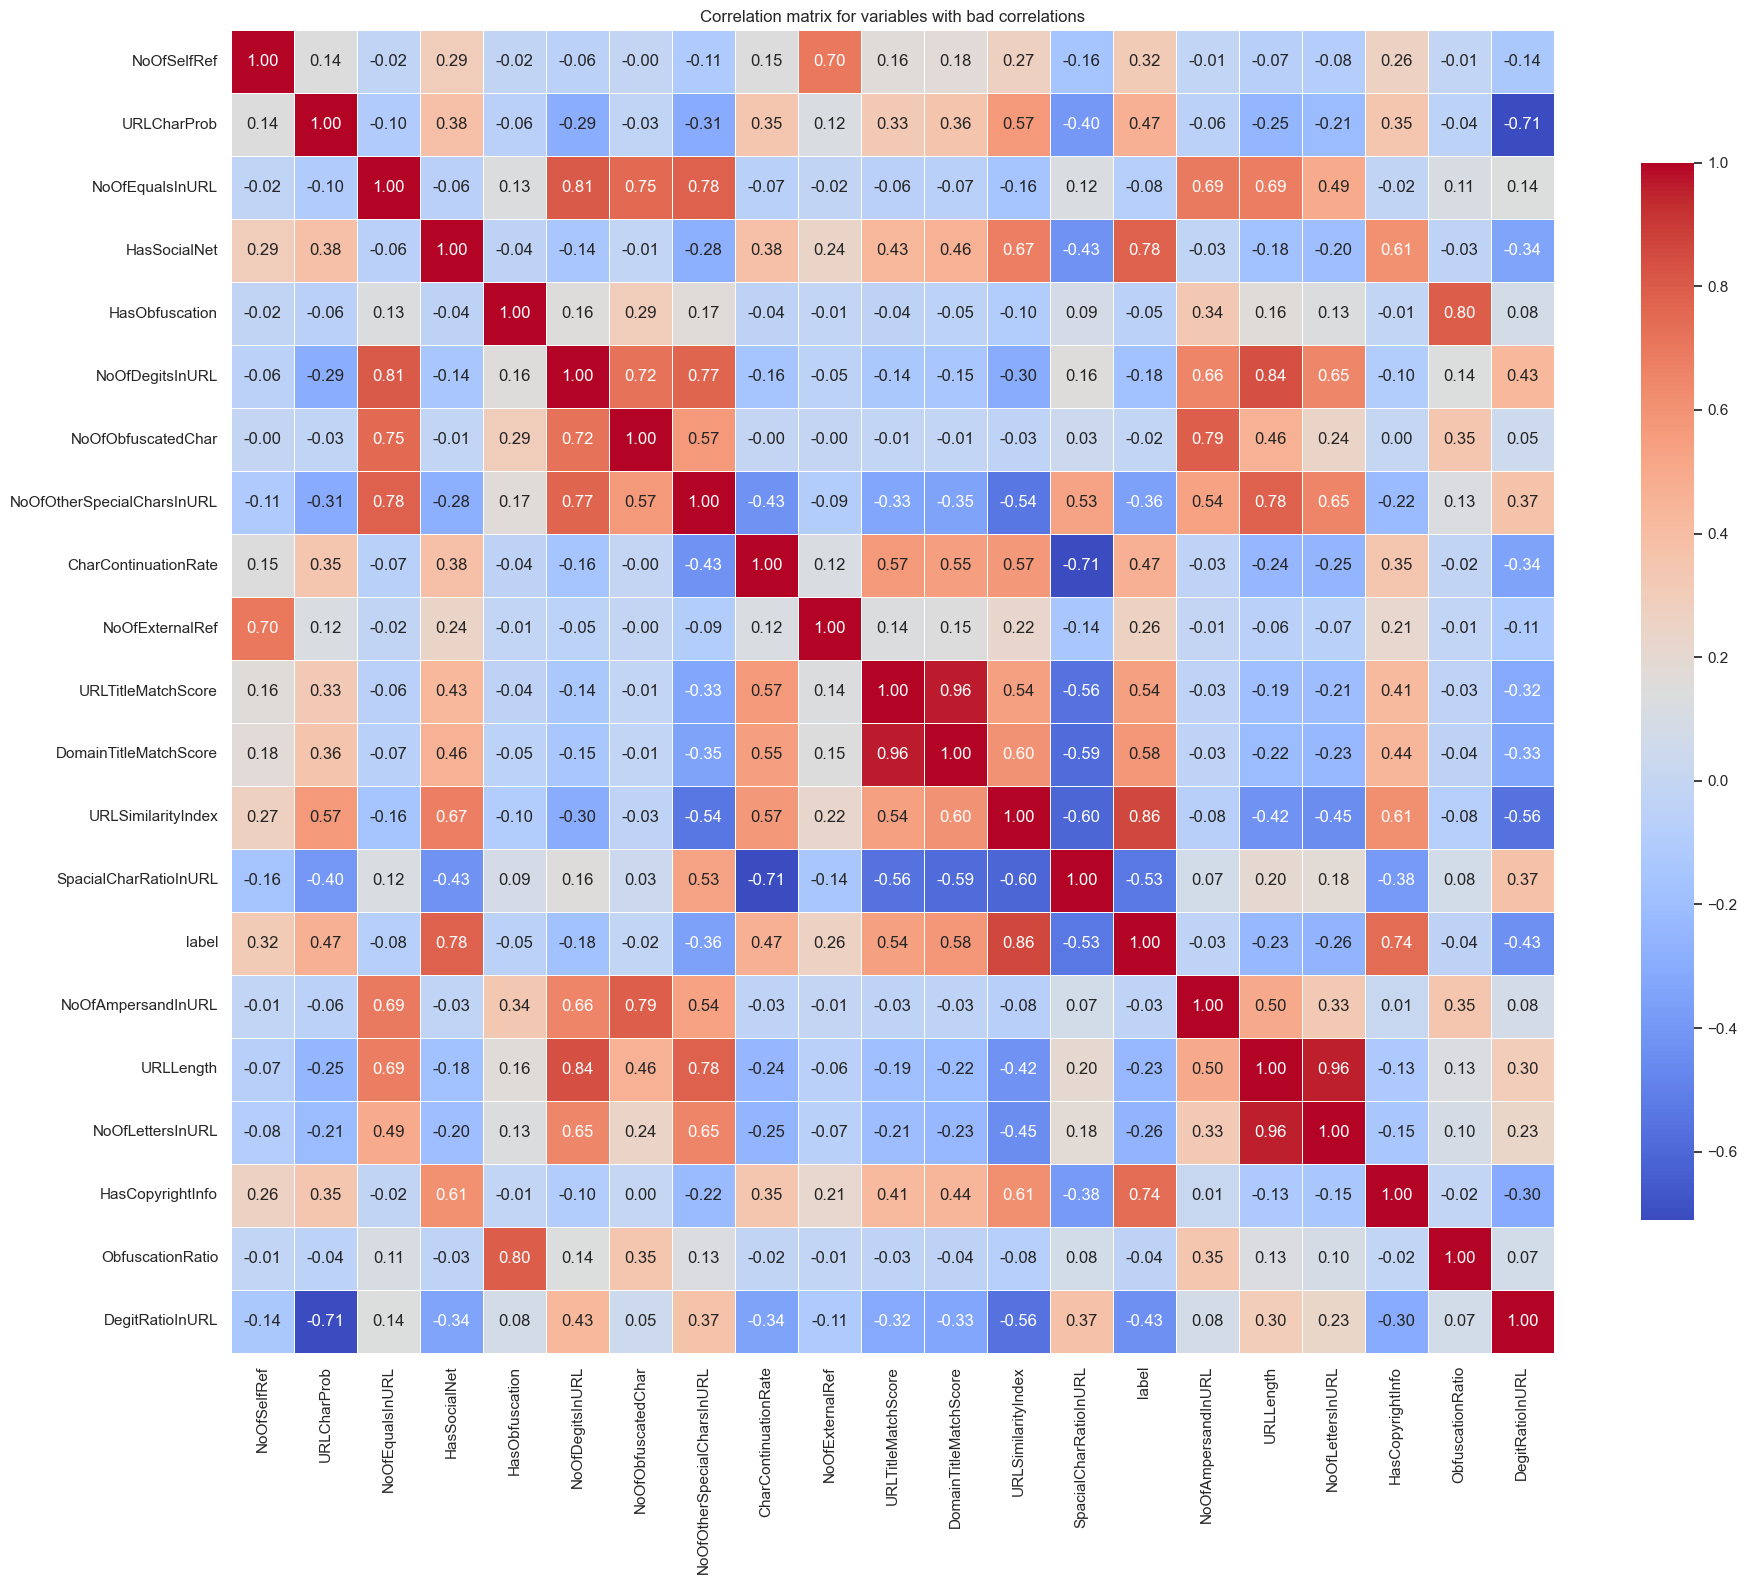

In [17]:
# حساب مصفوفة الارتباط
corr_matrix = df[numeric_columns].corr()

# تحديد الارتباطات القوية
strong_corr_threshold = 0.7
strong_correlations = np.abs(corr_matrix) > strong_corr_threshold

# الحصول على قائمة الميزات ذات الارتباطات القوية
strong_features = set()
for i in range(len(strong_correlations)):
    for j in range(i+1, len(strong_correlations)):
        if strong_correlations.iloc[i, j]:
            strong_features.add(strong_correlations.index[i])
            strong_features.add(strong_correlations.columns[j])

strong_features = list(strong_features)

# إنشاء مصفوفة ارتباط جديدة للميزات ذات الارتباطات القوية فقط
strong_corr_matrix = corr_matrix.loc[strong_features, strong_features]

# رسم مصفوفة الارتباط
plt.figure(figsize=(20, 16))
sns.heatmap(strong_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', 
            square=True, cbar_kws={"shrink": .8})
plt.title('Correlation matrix for variables with bad correlations')
plt.tight_layout()
plt.show()

# مرحلة المعالجة
## القيم المفقودة

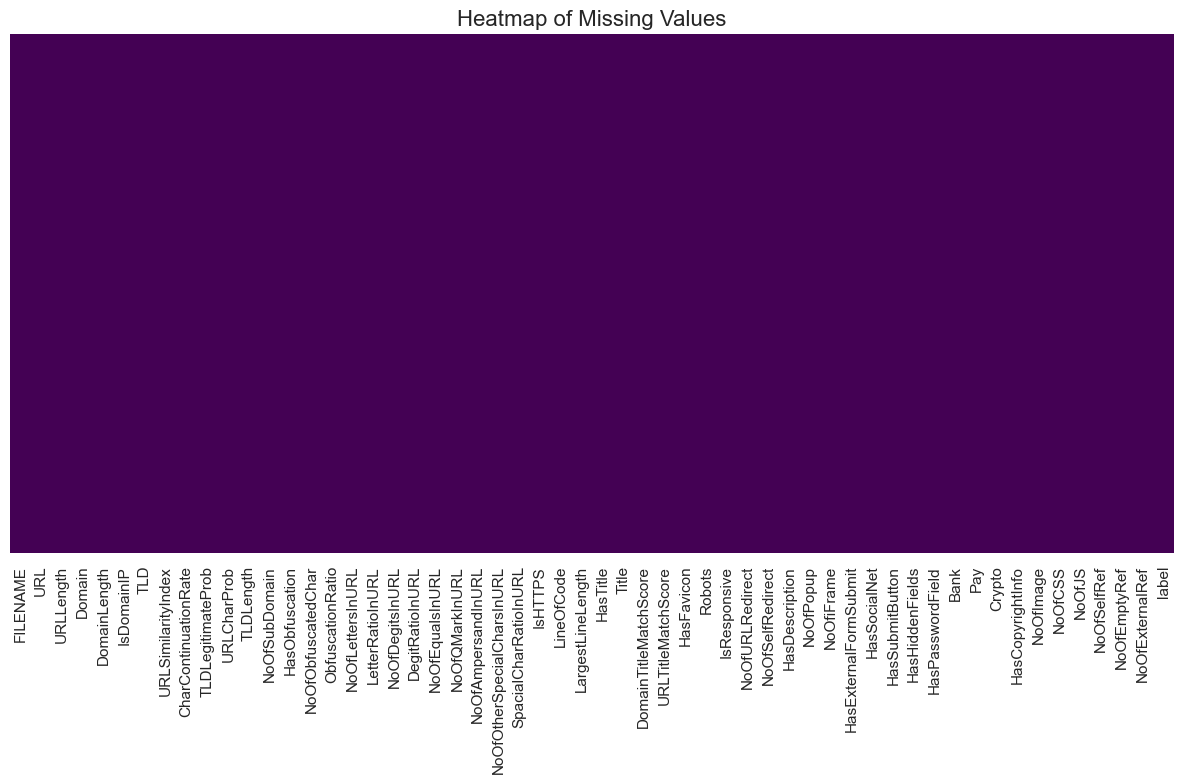

In [18]:
# 2. Heatmap for missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Values', fontsize=16)
plt.text(0.5, -0.1, '', 
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
plt.tight_layout()
plt.show()

## القيم المتطرفة في مجموعة البيانات

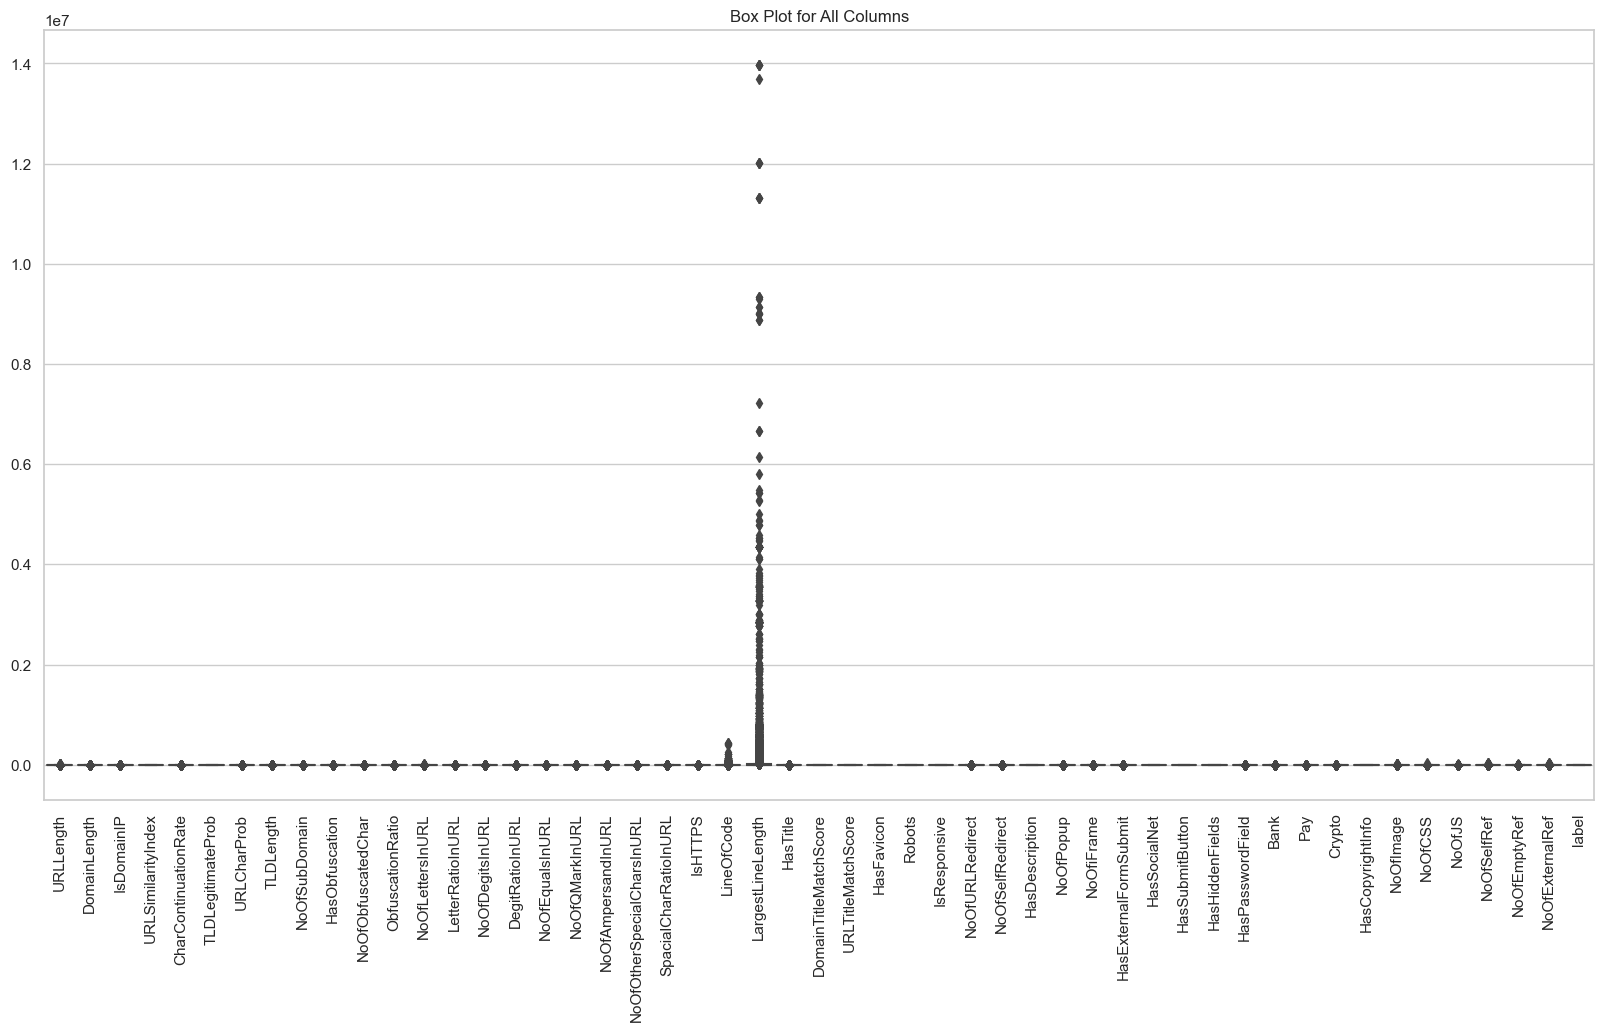

In [19]:
# # إنشاء مخطط الصندوق لجميع الأعمدة
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plot for All Columns')
plt.show()

## معالجة القيم المتطرفة

In [20]:
# تحديد الأعمدة الرقمية فقط
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# معالجة القيم الشاذة لكل عمود رقمي
for column in numeric_columns:
    # حساب الربيع الأول (Q1) والثالث (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # حساب المدى الربيعي (IQR)
    IQR = Q3 - Q1
    
    # تحديد حدود القيم الشاذة
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # استبدال القيم الشاذة بـ NaN
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])

# حذف الصفوف التي تحتوي على قيم NaN
df.dropna(inplace=True)

# عرض DataFrame بعد معالجة القيم الشاذة
# print(df)

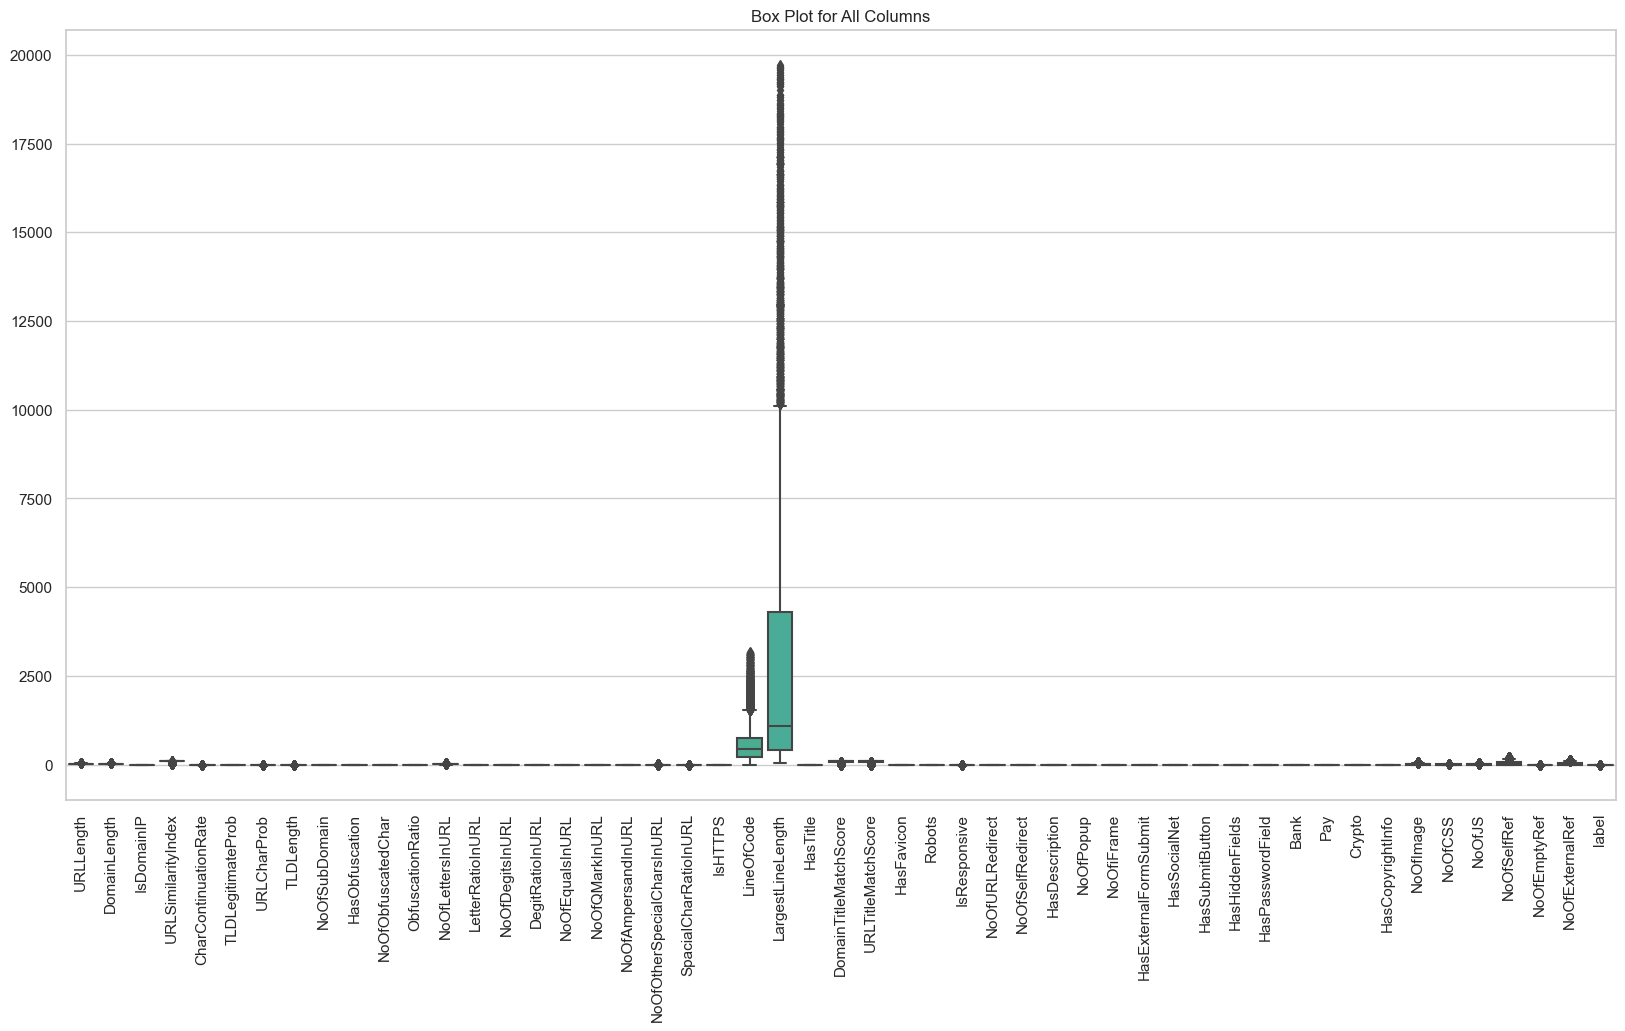

In [21]:
# # إنشاء مخطط الصندوق لجميع الأعمدة
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plot for All Columns')
plt.show()

In [22]:
df.shape

(26607, 56)

## توضيح قبل تحويل الخصائص الفئوية الى رقمية

In [23]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns before encoding:")
df[categorical_columns]

Categorical columns before encoding:


,FILENAME,URL,Domain,TLD,Title
7,696732.txt,https://www.nerdscandy.com,www.nerdscandy.com,com,nerds candy
25,683655.txt,https://www.bwresearch.com,www.bwresearch.com,com,bw research partnership
38,62523.txt,https://www.vysor.io,www.vysor.io,io,vysor
46,386777.txt,https://www.ainewsletter.com,www.ainewsletter.com,com,ainewsletter
48,527611.txt,https://www.sweatdrop.com,www.sweatdrop.com,com,sweatdrop
...,...,...,...,...,...
235744,447944.txt,https://www.silica-safe.org,www.silica-safe.org,org,silica-safe
235761,777337.txt,https://www.riverbluffcave.com,www.riverbluffcave.com,com,riverbluffcave
235771,8037463.txt,https://attupdate.godaddysites.com/,attupdate.godaddysites.com,com/,attupdategodaddysites
235779,794073.txt,https://www.phillipboa.de,www.phillipboa.de,de,phillipboa


## معالجة الخصائص الفئوية وتحويلها للرقمية

In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [26]:
# الخلية 4: معالجة البيانات الفئوية
def encode_categorical_data(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    label_encoders = {}
    
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
    
    return df, label_encoders

df, label_encoders = encode_categorical_data(df)

## توضيح قبل تحويل الخصائص الفئوية الى رقمية

In [27]:
df[categorical_columns]

,FILENAME,URL,Domain,TLD,Title
7,16018,17405,17336,116,16010
25,15595,6415,6352,116,3660
38,14152,25361,25290,327,25162
46,5804,3889,3828,116,531
48,10772,22942,22871,116,22377
...,...,...,...,...,...
235744,8063,21728,21657,458,21031
235761,18728,20595,20525,116,19713
235771,21018,371,366,117,1961
235779,19336,19027,18958,242,17885


## تسوية القيم (Scaling)

In [28]:
from sklearn.preprocessing import StandardScaler

# دالة لتنفيذ التسوية القياسية
def scale_data_standardization(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    return scaled_df, scaler

# تنفيذ التسوية القياسية
scaled_df_standard, scaler_standard = scale_data_standardization(df)

# عرض البيانات بعد التسوية القياسية
print("\nData after Standardization:")
scaled_df_standard


Data after Standardization:


,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,0.353480,0.537419,-0.371901,0.537301,-0.329516,0.0,-0.687264,0.395493,0.494117,0.914077,...,0.0,0.0,0.724099,0.544744,-0.585337,1.811635,-0.080155,-0.515344,-0.480314,0.412499
1,0.298407,-0.893879,-0.371901,-0.895012,-0.329516,0.0,-0.687264,0.395493,0.494117,0.914077,...,0.0,0.0,0.724099,-0.122712,-0.585337,-0.598393,-0.914708,2.734275,-0.812538,0.412499
2,0.110536,1.573579,-1.403294,1.574503,-1.470192,0.0,0.685330,0.395493,0.494117,-1.166396,...,0.0,0.0,0.724099,-0.856913,-0.152904,-0.062831,-0.791979,-0.515344,-0.812538,0.412499
3,-0.976333,-1.222856,-0.028104,-1.224142,0.050710,0.0,-0.687264,0.395493,0.494117,0.914077,...,0.0,0.0,0.724099,-0.990404,-0.801553,-1.000065,-0.448340,1.109465,-0.299100,0.412499
4,-0.329524,1.258537,-0.543800,1.259065,-0.519629,0.0,-0.687264,0.395493,0.494117,0.914077,...,0.0,0.0,0.724099,0.477998,-0.801553,-0.464503,-0.006518,-0.515344,-0.570920,0.412499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26602,-0.682222,1.100431,-0.200003,1.100760,-0.139403,0.0,1.537509,0.395493,-1.592020,-0.892921,...,0.0,0.0,0.724099,-0.256203,-0.152904,-0.598393,0.091665,-0.515344,-0.812538,0.412499
26603,0.706309,0.952873,0.315694,0.953147,0.430935,0.0,-0.687264,0.395493,0.494117,0.914077,...,0.0,0.0,0.724099,-0.589931,-0.801553,-1.133955,-0.546523,-0.515344,-0.691729,0.412499
26604,1.004455,-1.681027,1.175188,-1.675586,1.191386,0.0,-0.680759,-1.288665,-1.852787,0.914077,...,0.0,0.0,0.724099,-0.790168,-1.017770,-0.464503,-0.914708,-0.515344,-0.872942,-2.424246
26605,0.785467,0.748662,-0.543800,0.748810,-0.519629,0.0,0.132389,0.395493,0.494117,-1.085934,...,0.0,0.0,0.724099,1.145454,0.063312,0.740511,-0.595614,-0.515344,0.304944,0.412499


## اختيار الخصائص

In [59]:
columns_to_drop = ['FILENAME']

In [60]:
## حذف الاعمدة التي تم تحديدها
scaled_df_standard.drop(columns=columns_to_drop, inplace=True)

#  أخذ عينة عشوائية حجمها 1000 لاختبار النماذج بها بعد التدريب

In [31]:
# أخذ عينة عشوائية حجمها 1000
sample = scaled_df_standard.sample(n=1000, random_state=42)

# حفظ العينة في ملف اكسل جديد
sample.to_excel('sample_1000.xlsx', index=False)

In [36]:
# الخلية 1: استيراد المكتبات اللازمة
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [37]:
# pip install xgboost

In [38]:
## تقسيم البيانات

In [39]:
# الخلية 5: تقسيم البيانات وتطبيعها
X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("شكل بيانات التدريب:", X_train_scaled.shape)
print("شكل بيانات الاختبار:", X_test_scaled.shape)

شكل بيانات التدريب: (21285, 54)
شكل بيانات الاختبار: (5322, 54)


In [40]:
# الخلية 2: تعريف الدالة لتدريب وتقييم النموذج
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

In [41]:
# دالة لعرض مصفوفة الارتباك
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('The real value')
    plt.xlabel('Expected value')
    plt.show()

## نموذج RandomForestClassifier

نتائج الغابة العشوائية:
الدقة: 1.0000
تقرير التصنيف:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       749
         1.0       1.00      1.00      1.00      4573

    accuracy                           1.00      5322
   macro avg       1.00      1.00      1.00      5322
weighted avg       1.00      1.00      1.00      5322



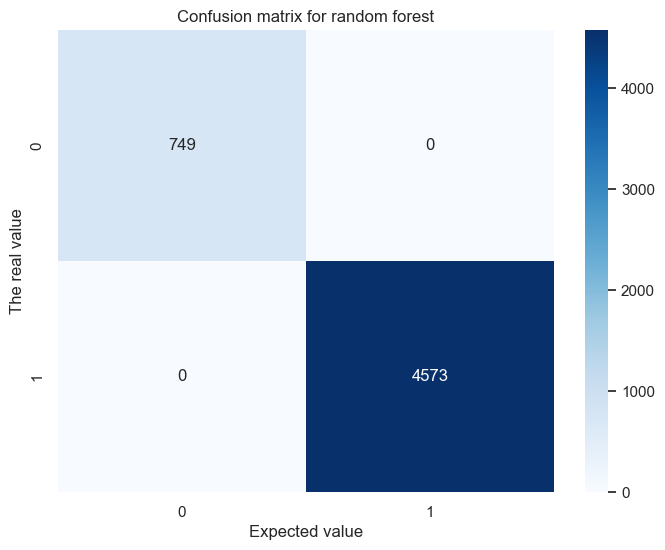

In [44]:
# الخلية 3: الغابة العشوائية
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)

print("نتائج الغابة العشوائية:")
print(f"الدقة: {rf_accuracy:.4f}")
print("تقرير التصنيف:")
print(rf_report)
plot_confusion_matrix(rf_cm, "Confusion matrix for random forest")

## نموذج LogisticRegression

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


نتائج الانحدار اللوجستي:
الدقة: 0.9968
تقرير التصنيف:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       749
         1.0       1.00      1.00      1.00      4573

    accuracy                           1.00      5322
   macro avg       0.99      0.99      0.99      5322
weighted avg       1.00      1.00      1.00      5322



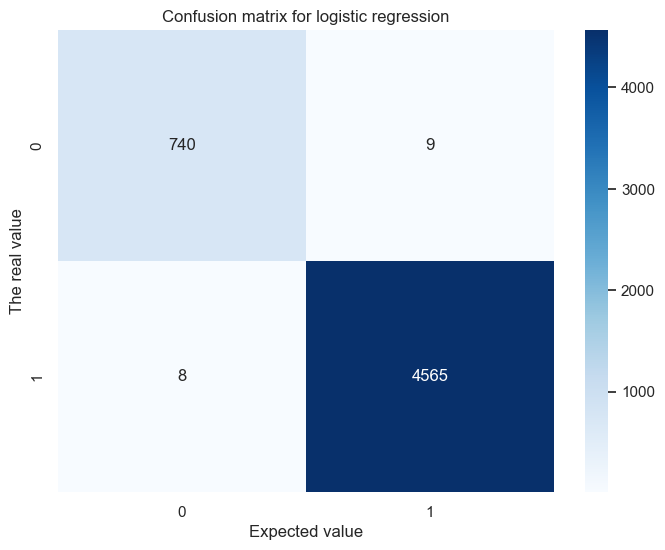

In [43]:
# الخلية 5: الانحدار اللوجستي
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_report = classification_report(y_test, lr_predictions)
lr_cm = confusion_matrix(y_test, lr_predictions)

print("نتائج الانحدار اللوجستي:")
print(f"الدقة: {lr_accuracy:.4f}")
print("تقرير التصنيف:")
print(lr_report)
plot_confusion_matrix(lr_cm, "Confusion matrix for logistic regression")

# نموذج الشبكة العصبية

نتائج الشبكة العصبية الاصطناعية:
الدقة: 0.9991
تقرير التصنيف:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       749
         1.0       1.00      1.00      1.00      4573

    accuracy                           1.00      5322
   macro avg       1.00      1.00      1.00      5322
weighted avg       1.00      1.00      1.00      5322



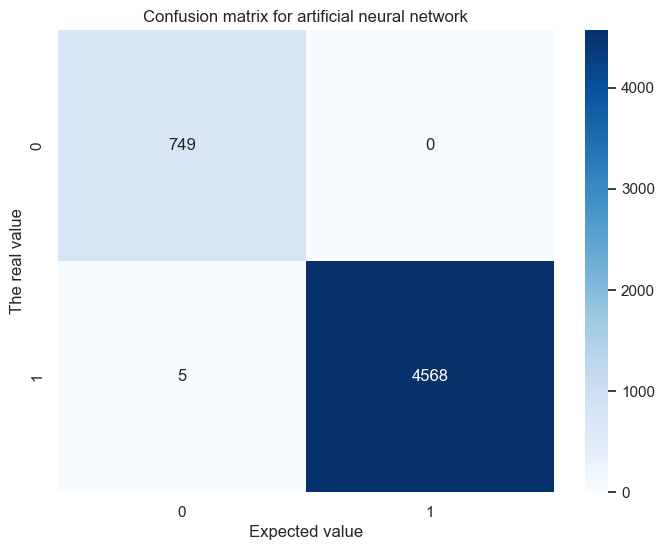

In [42]:
# الخلية 7: الشبكة العصبية الاصطناعية
nn_model = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=300, random_state=42)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predictions)
nn_report = classification_report(y_test, nn_predictions)
nn_cm = confusion_matrix(y_test, nn_predictions)

print("نتائج الشبكة العصبية الاصطناعية:")
print(f"الدقة: {nn_accuracy:.4f}")
print("تقرير التصنيف:")
print(nn_report)
plot_confusion_matrix(nn_cm, "Confusion matrix for artificial neural network")

In [45]:
# الخلية 8: مقارنة النتائج
results = {
    "Random forest": rf_accuracy,
    "Logistic regression": lr_accuracy,
    "Artificial neural network": nn_accuracy
}

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

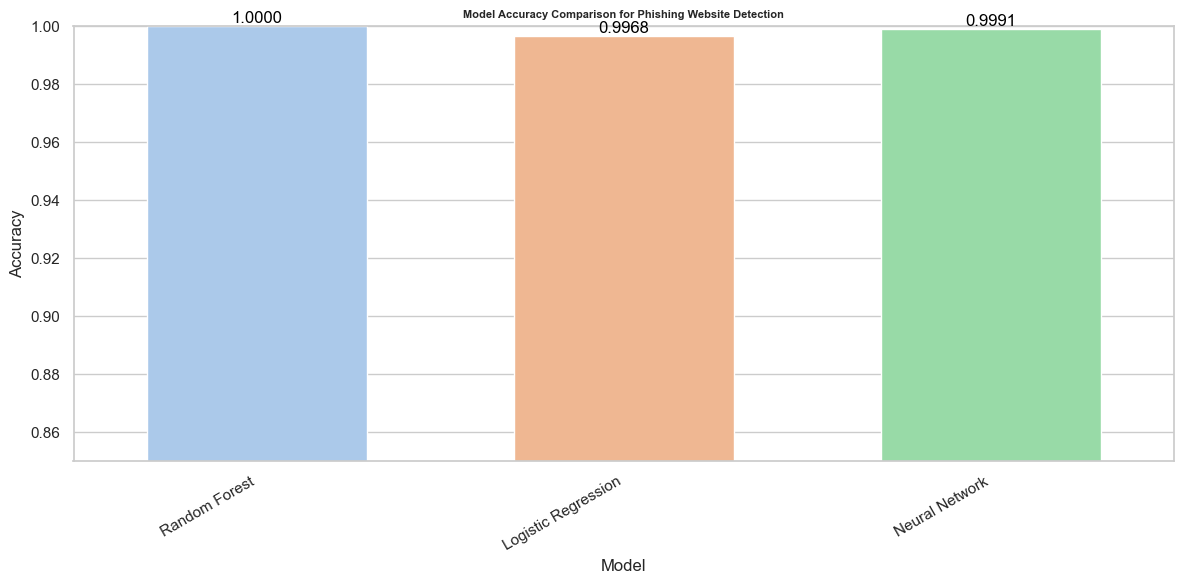

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# نفترض أن لدينا النتائج في قاموس يسمى 'results'
results = {
    'Random Forest': {'accuracy': rf_accuracy},
    'Logistic Regression': {'accuracy': lr_accuracy},
    'Neural Network': {'accuracy': nn_accuracy}
}

# تحويل النتائج إلى DataFrame
df_results = pd.DataFrame([(model, res['accuracy']) for model, res in results.items()],
                          columns=['Model', 'Accuracy'])

# تعيين نمط seaborn
sns.set_style("whitegrid")
sns.set_palette("pastel")

# إنشاء الرسم البياني
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=df_results, width=0.6)

# تعديل عنوان ومحاور الرسم البياني
plt.title('Model Accuracy Comparison for Phishing Website Detection', fontsize=8, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.85, 1.0)  # تعديل هذا النطاق حسب القيم الفعلية

# إضافة قيم الدقة فوق كل صندوق
for i, v in enumerate(df_results['Accuracy']):
    ax.text(i, v, f'{v:.4f}', ha='center', va='bottom', color='black')

# تدوير تسميات المحور السيني لتحسين القراءة
plt.xticks(rotation=30, ha='right')

# تحسين تخطيط الرسم البياني
plt.tight_layout()

# عرض الرسم البياني
plt.show()

In [56]:
# Print results table
print("Model Accuracy Comparison:")
print(df_results.sort_values(by='Accuracy', ascending=False))

Model Accuracy Comparison:
                 Model  Accuracy
0        Random Forest  1.000000
2       Neural Network  0.999061
1  Logistic Regression  0.996806


## الاختبار على بيانات غير مرئية باستخدام الملف الذي قمنا بفصله قبل تدريب البياناتلى النماذج

In [57]:
new_data = pd.read_excel('sample_1000.xlsx')

# فصل الميزات (X) والتسميات (y) للبيانات الجديدة
X_new = new_data.drop('label', axis=1)
y_new = new_data['label']

# تدريب النموذج الأفضل (على سبيل المثال، Random Forest) باستخدام أفضل المعلمات
best_model = RandomForestClassifier(random_state=42)  # استبدل بأفضل معلمات تم تحديدها سابقًا
best_model.fit(X_train, y_train)

# التنبؤ باستخدام النموذج على البيانات الجديدة
y_new_pred = best_model.predict(X_new)

# حساب مقاييس التقييم للبيانات الجديدة
new_accuracy = accuracy_score(y_new, y_new_pred)
new_precision = precision_score(y_new, y_new_pred)
new_recall = recall_score(y_new, y_new_pred)
new_f1 = f1_score(y_new, y_new_pred)

# طباعة نتائج التقييم للبيانات الجديدة
print("New Data Evaluation:")
print(f"Accuracy: {new_accuracy:.4f}")
print(f"Precision: {new_precision:.4f}")
print(f"Recall: {new_recall:.4f}")
print(f"F1 Score: {new_f1:.4f}")

# مقارنة النتائج مع نتائج التدريب والاختبار السابقة
print("\nComparison:")
print(f"Training Accuracy: {df_results.loc[df_results['Model'] == 'Random Forest', 'Accuracy'].values[0]:.4f}")
print(f"Testing Accuracy: {df_results.loc[df_results['Model'] == 'Random Forest', 'Accuracy'].values[0]:.4f}")
print(f"New Data Accuracy: {new_accuracy:.4f}")

New Data Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Comparison:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
New Data Accuracy: 1.0000


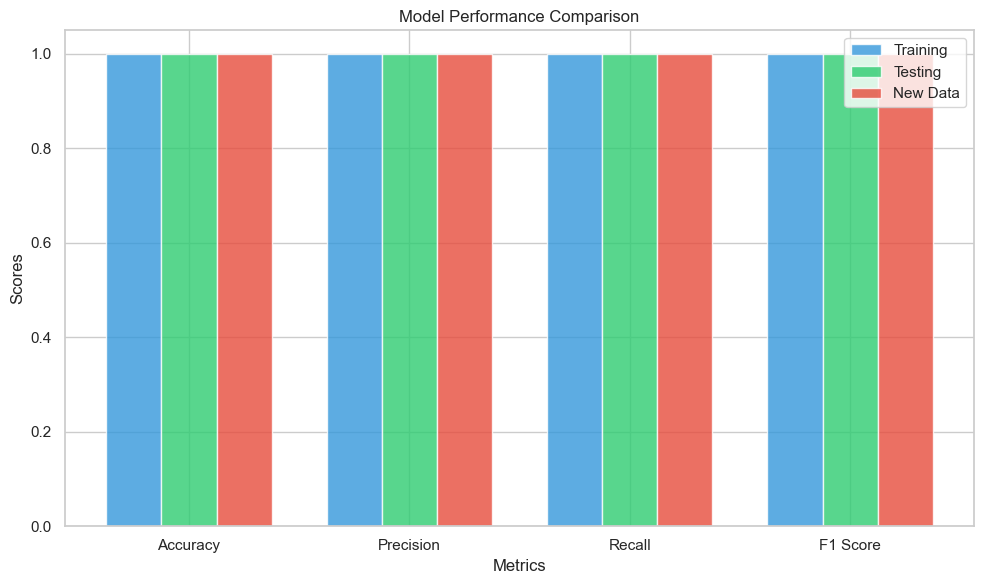

In [58]:
import matplotlib.pyplot as plt

# تحديد مقاييس التقييم ومجموعات البيانات
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
datasets = ['Training', 'Testing', 'New Data']

# تحديد قيم المقاييس لكل مجموعة بيانات
training_scores = [1.0, 1.0, 1.0, 1.0]
testing_scores = [1.0, 1.0, 1.0, 1.0]
new_data_scores = [1.0, 1.0, 1.0, 1.0]

# تحديد ألوان الأعمدة
colors = ['#3498db', '#2ecc71', '#e74c3c']

# إنشاء مخطط شريطي
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
opacity = 0.8

index = range(len(metrics))
plt.bar(index, training_scores, bar_width, alpha=opacity, color=colors[0], label='Training')
plt.bar([i + bar_width for i in index], testing_scores, bar_width, alpha=opacity, color=colors[1], label='Testing')
plt.bar([i + 2 * bar_width for i in index], new_data_scores, bar_width, alpha=opacity, color=colors[2], label='New Data')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks([i + bar_width for i in index], metrics)
plt.legend()

plt.tight_layout()
plt.show()
